<a href="https://colab.research.google.com/github/rahmanole/MDTrAnal/blob/master/KCUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import os
import sys
#from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper
import parmed
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


In [3]:
sample_x_0 = np.random.normal(0,1,size=2000)
sample_x_1 = np.random.normal(0,1,size=2000)


sample_y_0 = np.random.normal(0,2,size=2000)
sample_y_1 = np.random.normal(0,2,size=2000)


sample_z_0 = np.random.normal(0,2,size=2000)
sample_z_1 = np.random.normal(0,2,size=2000)


sample_x = np.cumsum(sample_x_0)
sample_y = np.cumsum(sample_y_0)
sample_z = np.cumsum(sample_z_0)

sample_x

array([ -0.24324208,  -0.51033327,   0.13028472, ..., -58.60491825,
       -60.25645125, -60.66245326])

In [11]:
def gk(x,y):
  return np.exp(-((x-y)**2/2.0))


def mmd(x_n_1, x_n, y_n_1, y_n, gamma=0.5):

    xx = gk(x_n_1, x_n)
    yy = gk(y_n_1, y_n)
    xy = gk(x_n_1, y_n)
    yx = gk(x_n, y_n_1)
  
 
    


    return xx + yy - xy - yx    

In [12]:
def mmd2(z_n_1, z_n, y_n_1, y_n, gamma=0.5):

    zz = gk(z_n_1, z_n)
    yy = gk(y_n_1, y_n)
    zy = gk(z_n_1, y_n)
    yz = gk(z_n, y_n_1)
  

    
    

    return zz + yy - zy - yz    

In [13]:
def mmd3(x_n_1, x_n, z_n_1, z_n, gamma=0.5):

    xx = gk(x_n_1, x_n)
    zz = gk(z_n_1, z_n)
    xz = gk(x_n_1, z_n)
    zx = gk(x_n, z_n_1)
  

    

    return xx + zz - xz - zx     

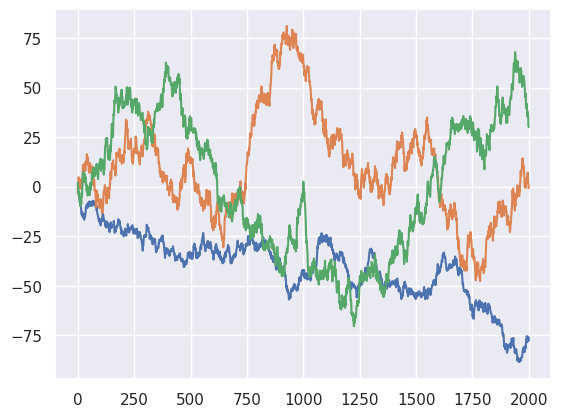

In [40]:
plt.plot(np.arange(0,2000),sample_x)
plt.plot(np.arange(0,2000),sample_y)
plt.plot(np.arange(0,2000),sample_z)
plt.show()

In [29]:
data = mmd(sample_x_0,sample_x_1,sample_y_0,sample_y_1,sample_z_0,sample_z_1)

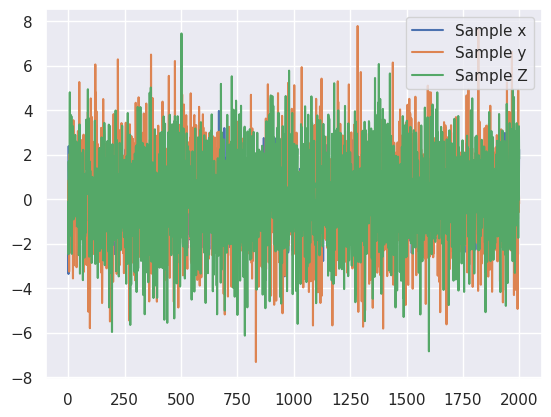

In [8]:
plt.plot(np.arange(0,2000),sample_x_0, label='Sample x')
plt.plot(np.arange(0,2000),sample_y_0, label='Sample y')
plt.plot(np.arange(0,2000),sample_z_0, label='Sample Z')
plt.legend()
plt.show()

In [25]:
T_kcusum = 0

def KCUSUM(sample_x_0,sample_x_1,sample_y_0,sample_y_1,sample_z_0,sample_z_1,h,delta=0):
  global T_kcusum  
  Z_n = 0
  h >= 0
  delta = 0
  n = 400

  for i in range(2,n):

    #sample y

    if i%2 == 0:
      av_n = mmd(sample_x_0,sample_x_1,sample_y_0,sample_y_1).mean() + mmd2(sample_z_0,sample_z_1,sample_y_0,sample_y_1).mean() + mmd3(sample_x_0,sample_x_1,sample_z_0,sample_z_1).mean()
      v_n = av_n/3
    else:
      v_n = 0
      
    Z_n += v_n

    if Z_n < 0:
      Z_n = 0

    if Z_n > h:
      T_kcusum = i
      break
  return T_kcusum

In [26]:
KCUSUM(sample_x_0,sample_x_1,sample_y_0,sample_y_1,sample_z_0,sample_z_1,5)

156

In [11]:
trace = [sample_x,sample_y,sample_z]
trace = np.array(trace)
trace.shape
trace[:,156]

array([ -1.26028609, -24.73117756,   8.31469303])

In [15]:
sample_a = [sample_x_0,sample_y_0,sample_z_0]
sample_b = [sample_x_1,sample_y_1,sample_z_1]
sample_a = np.array(sample_a)
sample_b = np.array(sample_b)
sample_b.shape

(3, 2000)

In [18]:
a_sparse, b_sparse = sparse.csr_matrix(sample_a), sparse.csr_matrix(sample_b)
sim_sparse = cosine_similarity(a_sparse, b_sparse, dense_output=True)
print(sim_sparse)

[[ 0.00798422  0.0113843  -0.0008589 ]
 [ 0.00767386 -0.04268317 -0.0078294 ]
 [-0.01395902 -0.00581703  0.04761105]]


In [19]:
sim_array = cosine_similarity(sample_a,sample_b,dense_output=True)
print(sim_array)

[[ 0.00798422  0.0113843  -0.0008589 ]
 [ 0.00767386 -0.04268317 -0.0078294 ]
 [-0.01395902 -0.00581703  0.04761105]]


In [21]:
def cp_vs_h(sample_x_0,sample_y_0,sample_z_0,h_start,h_end,step,delta):
    cps = []
    hs = []
    while h_start<h_end:
        cp = KCUSUM(sample_x_0,sample_x_1,sample_y_0,sample_y_1,sample_z_0,sample_z_1,h=0,delta=0)
        hs.append(h_start)
        cps.append(cp)
        h_start += step
        plt.plot(hs,cps)
        plt.xlabel('Value of h')
        plt.ylabel('Change points')

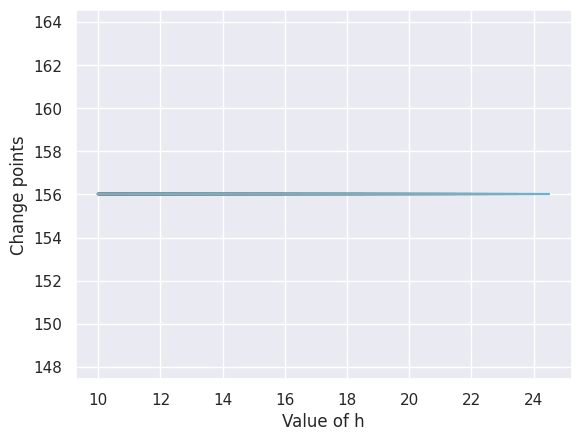

In [28]:
cp_vs_h(sample_x,sample_y,sample_z_0,10,25,0.5,0.05)
plt.show()